## Introduction

These notebooks describe how to undertake analyses introduced as examples in the
Ninth Edition of *Introduction to the Practice of Statistics* (2017) by Moore, McCabe, and Craig.
The data used in the notebooks are from the R version of the notebooks found at https://nhorton.people.amherst.edu/ips9/.

## Setup

First load the IPS (short for *Introduction to the Practice of Statistics*) package and dependencies. If you're doing this for the first time, there may be a great deal more output as the dependent packages are download and compiled. This typically only happens once.

In [1]:
(ql:quickload :ips)

To load "ips":
  Load 1 ASDF system:
    ips
; Loading "ips"
[package yason.system].

(:IPS)

In [2]:
(in-package :ips)

#<PACKAGE "IPS">

# Chapter 1: Looking at data &mdash; distributions

## Example 1.1 Restaurant discount coupons

The first example defines the terms cases, labels and variables as they are used in statistical analysis. To load the example, use the following command:

In [8]:
(load #P"IPS:DATA;coupons")

T


;;   TYPE    NAME             ITEM           REG-PRICE DISC-PRICE
;; 0 Italian Domo's           Pizza                 20         10
;; 1 Italian Mama Rita's      Pizza                 20         12
;; 2 BBQ     Smokey McSween's Barbecue              30         17
;; 3 BBQ     Smokey Grill     Ribs                  20         11
;; 4 Mexican Dos Amigos       Tacos                 16          8
;; 5 Mexican Holy Guacamole   Steak fajitas         13          8
;; 6 Seafood Sea Grill        Shrimp platter        20         11



These are the cases. Data for each coupon is listed on a different line, and the first column has the coupons numbered 0 to 6. Lisp numbering starts at 0. The remaining columns give the type of restaurant, the name of the restaurant, the item being discounted, the regular price and the discount price. Together this information, that is the information about the data, is known as 'meta-data', and collectively referred to as the 'data dictionary' associated with the data set.

## Example 1.2 Categorical and quantitative variables for coupons

The restaurant discount data set has six variables (rows): coupon number, type of restaurant, name of restaurant, item, regular price and discount price. The two price variables are _quantitative_ variables. Coupon number, type of restaurant, name of restaurant and item are _categorical_ variables.

We can see the variable types and other information in Lisp-Stat using the [describe](http://www.lispworks.com/documentation/lw70/CLHS/Body/f_descri.htm) command. To see the key characteristics of a data set (the data dictionary) for the coupon data set:

In [9]:
(describe coupons)

COUPONS
  A data-frame with 7 observations of 5 variables

Variable   | Type        | Unit | Label                   
--------   | ----        | ---- | -----------             
TYPE       | CATEGORICAL | NIL  | Type of restaurant      
NAME       | CATEGORICAL | NIL  | Name of restaurant      
ITEM       | CATEGORICAL | NIL  | Discounted item         
REG-PRICE  | INTEGER     | USD  | Regular price of item   
DISC-PRICE | INTEGER     | USD  | Discounted price of item


## Example 1.6 Comparing colleges based on graduates

This example adjusts one variable to create another. In this case we want to compare the graduation rate among colleges, and to compare apples to apples, need to adjust for the total student population. This is simple division. In College A there were 1000 first year students, and 800 graduated within 6 years, so the graduation rate is:

In [10]:
(/ 800 1000)

4/5

College B has 2000 students who entered the same year, and 1200 graduated within 6 years. College B's graduation rate is:

In [11]:
(/ 1200 2000)

3/5

Note two things about these calculations:

1. Lisp-Stat uses [prefix notation](https://en.wikipedia.org/wiki/Polish_notation). This means parentheses are not required for grouping operations. There is no ambiguity.
2. Results are returned in rational format. Most systems use floating point, and have limited accuracy. Rational numbers are exact, and this is great for statistical work.

## 1.2 Displaying distributions with graphs

This chapter of the text describes exploratory data analysis and suggests two basic strategies:

- Examining each variable in isloation, then study the relationships among the variables
- Begin with plotting the variables, then add numerical summaries of specific aspects of the data

This chapter presents methods for analysing a single variable, beginning first with graphical display, then adding numerical summaries for a more complete description.

### Categorical variables: Bar graphs and pie charts

The values of a categorical variable are labels for the categories, such as 'male' and 'female'. The distribution of a categorical variable lists the categories and gives either the _count_ or the _percent_ of cases that fall in each category. An alternative to the percent is the proportion, the count divided by the sum of the counts. Note that the percent is simply the proportion times 100.

#### Example 1.7 How do you do online research?

In example 1.7, the distribution of a categorical variable is examined along with a demonstration of the count of each catagory as a percentage of the total. The data set is the preferences for online information resources taken from a survey of 552 first year university students.

First, read the data into a data frame with the name 'online'. Note that we're not using the usual convention of \*earmuffs\* on the variable name. The example data sets are named after the example number in the book, e.g. example 1.7 data is named eg01-07.

In [21]:
(defdf online (read-csv ips:eg01-07))

#<DATA-FRAME (4 observations of 2 variables)>

We can view the counts by typing the variable's name:

In [14]:
(print-data online)

NIL


;;   SOURCE    COUNT
;; 0 Google      406
;; 1 Library      75
;; 2 Wikipedia    52
;; 3 Other        19


Here we see the results presented as a summary. To see it as percentage, we need to determine the total counts and divide.

#### Example 1.8 Favorites as percents

First we determine the total count:

In [15]:
(sum online:count)

552

And now divide each count by the total and multiply by 100 to get the percentage:

In [16]:
(e* 100
    (e/ online:count 552.0))

#(73.55073 13.586956 9.42029 3.442029)

Notice the mathmatical operators were prefixed by '_e_'. This prefix signifies _elementwise_ operations. That is
the operator accepts either vectors or single numbers. The results are vectors if the inputs include vectors.

In the book, we are given a summary as data, and compute the percentages. Most of the time however, we are given raw
data and perform an analysis. Let's rework examples 1.7 & 1.8 using raw data. To start, load data from a file called
online-data:

In [19]:
(load #P"IPS:DATA;online-data")

T

For this example, we are working with a single variable, so have used the _def_ function to create a single variable
to work with. We can see all the variables defined this way with the function named _variables_:

In [21]:
(variables)

(SOURCES)

This function returns a list of defined variables, in this case only a single variable, with the name `sources`. To see the percentage summary of `sources`, use the `tabulate` command:

In [22]:
(tabulate sources)

#<NUM-UTILS.STATISTICS:SPARSE-COUNTER tally: 552, varieties: 4
  google  406  (73.6%)
  library  75  (13.6%)
  wikipedia  52  (9.4%)
  other  19  (3.4%)>

#### Example 1.9 Bar graph for the online resource preference data

This example displays the online resource preferences using a *bar graph*. The heights of the four bars show the percents of the students who reported each of the resources as their favourite.

In [24]:
(vega:defplot online-bar-chart `(:mark :bar
                                 :data ,online
                                 :encoding (:x (:field source :type "nominal"      :title "Online resource")
                                            :y (:field count  :type "quantitative" :title "Percentage preference"))))

#<PLOT ONLINE-BAR-CHART: Bar chart
NIL>

and plot it:

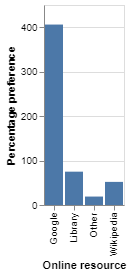

In [7]:
(ips:plot online-bar-chart)

We can see that the source labels are overlapping. Let's fix this by adding a width setting:

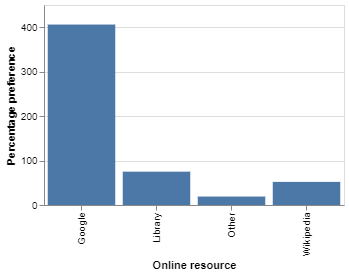

In [14]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :bar
                                  :width 300
                                  :data ,online
                                  :encoding (:x (:field source :type "nominal"      :title "Online resource")
                                             :y (:field count  :type "quantitative" :title "Percentage preference")))))

You should always consider the best way to order the values in a bar chart. In this case, we will sort X
by the value of Y, decending:

In [ ]:
(pushnew '("sort" . "-y") (accesses online-bar-chart :encoding :x))

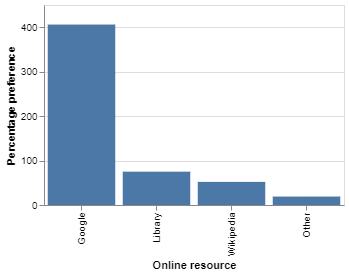

In [23]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :bar
                                  :width 300
                                  :data ,online
                                  :encoding (:x (:field source :type "nominal"      :title "Online resource" :sort "-y")
                                             :y (:field count  :type "quantitative" :title "Percentage preference")))))

#### Example 1.10 Pie chart for the online resource preference data
Figure 1.3 (page 11) displays the same data in a pie chart. We can create a spec and plot the data as pie chart by changing the `mark` and `encoding` parameters.

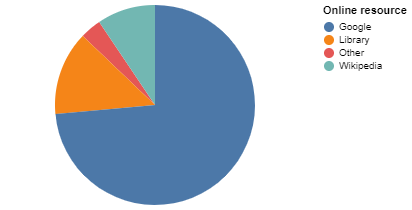

In [25]:
(ips:plot
 (vega:defplot online-bar-chart `(:mark :arc
                                  :width 300
                                  :data ,online
                                  :encoding (:color (:field source :type "nominal" :title "Online resource")
                                             :theta (:field count  :type "quantitative")))))

### Quantitative Variables: Stemplots and histograms
A _stemplot_ (stem-and-leaf plot) provides a quick graphical summary of the shape of a distribution. They are good for small data sets. For larger data sets, histograms work best.

#### Example 1.11 - Soluble corn fiber and calcium
This example show a stem-and-leaf plot of the effect of soluble corn fiber (SCF) on the absorption of calcium in adolescent boys and girls.

In [3]:
(defdf scf (read-csv ips:eg01-11))

#<DATA-FRAME (46 observations of 3 variables)>

Let's take a high-level look at this data set:

In [4]:
(summary scf)

(23 (50%) x "Control", 23 (50%) x "SCF",  46 reals, min=31, q25=43.166664,
 q50=48.4, q75=55, max=76)

A data-frame of 3 variables and 46 observations. This is small enough for us to print in its entirety. We'll use a helper function, `print-df` that we've added to the `IPS` package to make printing with Lisp-Stat easier when working with notebooks.

In [9]:
(print-df scf)

| ID | TREATMENT | ABSORPTION |
| ---: | :--- | ---: |
| 1 | Control | 42  |
| 2 | Control | 33  |
| 3 | Control | 41  |
| 4 | Control | 49  |
| 5 | Control | 42  |
| 6 | Control | 47  |
| 7 | Control | 48  |
| 8 | Control | 47  |
| 9 | Control | 53  |
| 10 | Control | 72  |
| 11 | Control | 47  |
| 12 | Control | 63  |
| 13 | Control | 68  |
| 14 | Control | 59  |
| 15 | Control | 35  |
| 16 | Control | 46  |
| 17 | Control | 43  |
| 18 | Control | 55  |
| 19 | Control | 38  |
| 20 | Control | 49  |
| 21 | Control | 51  |
| 22 | Control | 51  |
| 23 | Control | 66  |
| 24 | SCF | 50  |
| 25 | SCF | 43  |
| 26 | SCF | 43  |
| 27 | SCF | 44  |
| 28 | SCF | 50  |
| 29 | SCF | 44  |
| 30 | SCF | 35  |
| 31 | SCF | 49  |
| 32 | SCF | 54  |
| 33 | SCF | 76  |
| 34 | SCF | 31  |
| 35 | SCF | 48  |
| 36 | SCF | 61  |
| 37 | SCF | 70  |
| 38 | SCF | 62  |
| 39 | SCF | 47  |
| 40 | SCF | 42  |
| 41 | SCF | 45  |
| 42 | SCF | 43  |
| 43 | SCF | 59  |
| 44 | SCF | 53  |
| 45 | SCF | 53  |
| 46 | SCF | 73  |


We want the treatment group, so we'll use the [select](https://lisp-stat.dev/docs/tasks/select/) package to subset the data from ID 24 to 46:

In [11]:
(stem-and-leaf (select scf (range 23 nil) 'absorption)) ;arrays are 0 based, so we start at 23

NIL

3 | 1 5
4 | 2 3 3 3 4 4 5 7 8 9
5 | 0 0 3 3 4 9
6 | 1 2
7 | 0 3 6


#### Examples 1.12 & 1.13
Example 1.12 compares the data between the SCF and control groups using a back-to-back stemplot. Example 1.13 demonstrates *splitting stems* and *trimming* digits in the leaves to fine-tune the display of the stemplot to better observe characteristics of the data. Trimming (rounding) the data can be done using Common Lisp before plotting. Implementing a back-to-back stemplot is outlined in [issue #1](https://github.com/Lisp-Stat/plot/issues/1) and splitting in [issue #2](https://github.com/Lisp-Stat/plot/issues/2)

#### Example 1.14 - Distribution of IQ scores
This example looks at the IQ scores of 60 fifth-grade studens choosen at random from one school. We know that the distribution should be approximately 'bell shaped' and will draw a histogram to see if it is.

First, load the example data:

In [3]:
(defdf iq (read-csv ips::eg01-14))

#<DATA-FRAME (60 observations of 1 variables)>

and use the `hist` function to generate a histogram and frequency table. Following the instructions in the book, the range is from 75 to 155, with bin width of 10, so:

In [4]:
(plot/text:hist (75 155 10) (mapcar #'plot/text:hist-record (coerce iq:iq 'list)))

NIL

< 75:       0
75:         2       ## 
85:         3       ### 
95:         10      ########## 
105:        16      ################ 
115:        13      ############# 
125:        10      ########## 
135:        5       ##### 
145:        1       # 
> 155:      0


Note that this is a _text_ plot and the cell in the notebook renders markdown, so the numbers are slightly misaligned. If you did this from a REPL they would be aligned exactly. In this example, the `plot/text:hist` function did the binning for us. We can also plot this graphically and use Vega-Lite to do the binning.

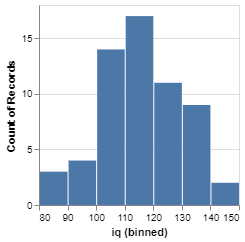

In [36]:
(ips:plot
 (vega:defplot iq-plot `(:mark :bar
                         :data ,iq
                         :encoding (:x (:field iq :bin (:maxbins 8))
                                    :y (:aggregate "count")))))